# Read image from csv file

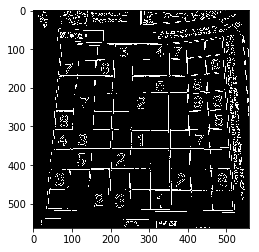

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import mpld3
mpld3.enable_notebook()

img_data = np.genfromtxt('./zybo/image_processed.csv', delimiter=',')
img_data = np.array(img_data)
img_data = img_data.reshape((563, -1))
#print(np.max(img_data))

#%matplotlib inline
plt.figure()
plt.imshow(img_data.astype(np.uint8), cmap='gray')
